In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from numpy.random import multinomial

def bootstrap(series, n=1000, *args, **kwargs):
    return multinomial(series.sum(), series/series.sum(), n)

In [3]:
import numpy as np

from lint.models import Bucket

def plot_bootstrap(token, w=8, h=8):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))
    
    plt.figure(figsize=(w, h))

    plt.plot(bs.mean(0))

    plt.fill_between(
        range(100),
        bs.mean(0) + 2*bs.std(0),
        bs.mean(0) - 2*bs.std(0),
        color='black',
        alpha=0.1,
    )
    
    plt.plot(series)
    
    print(token)
    plt.show()

a


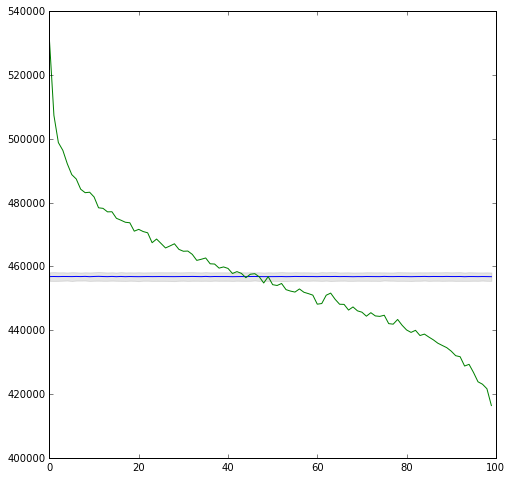

In [4]:
plot_bootstrap('a')

In [9]:
def zscores_series(token):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))
    
    return np.array([
        abs(observed-expected)/std
        for observed, std in zip(series, bs.std(0))
    ])

In [15]:
from joblib import Memory

from lint.models import Bucket

mem = Memory('cache')

token_counts = mem.cache(Bucket.token_counts)

tokens = token_counts(10000)

In [20]:
zscores = np.zeros((len(tokens), 100))

for i, token in enumerate(tokens.keys()):
    
    zscores[i] = zscores_series(token)
    
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


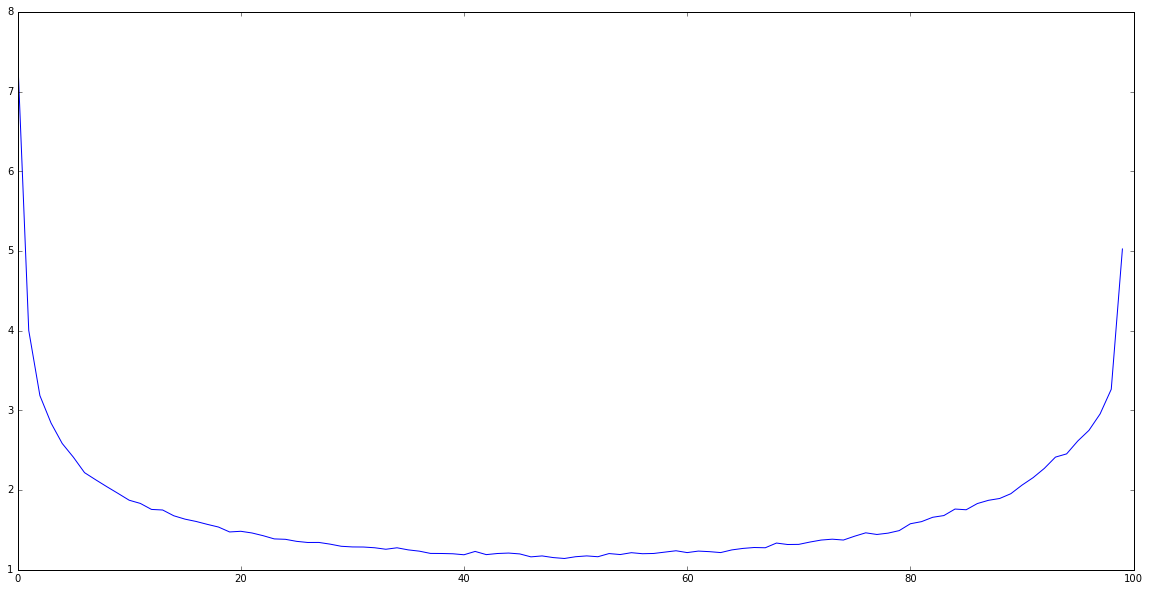

In [38]:
plt.figure(figsize=(20, 10))

plt.plot(zscores.mean(0))
plt.show()

In [39]:
zscores.mean(0).argmin()

49